# Scikit learn: Classification and clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [355]:
#import sklearn as sk
#sk.datasets

<module 'sklearn.datasets' from 'C:\\Users\\deangelis\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\__init__.py'>

In [356]:
from sklearn import datasets

In [357]:
datasets

<module 'sklearn.datasets' from 'C:\\Users\\deangelis\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\__init__.py'>

### The iris dataset

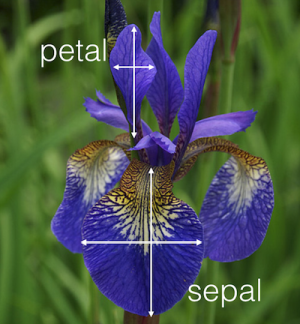

In [5]:
iris = datasets.load_iris()

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df = df.assign(target = iris['target'])
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
49,5.0,3.3,1.4,0.2,0
59,5.2,2.7,3.9,1.4,1
91,6.1,3.0,4.6,1.4,1
39,5.1,3.4,1.5,0.2,0
90,5.5,2.6,4.4,1.2,1


In [18]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
df = df.assign(target_name = lambda d : iris['target_names'][d['target']])
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
4,5.0,3.6,1.4,0.2,0,setosa
115,6.4,3.2,5.3,2.3,2,virginica
21,5.1,3.7,1.5,0.4,0,setosa
73,6.1,2.8,4.7,1.2,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa


What if we had the names and we wanted to convert them into numbers

In [22]:
categories = pd.Categorical(df['target_name'])
categories_codes = categories.codes
# df.sample(10)

In [23]:
categories_codes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

If you want to convert

In [79]:
# convert = np.array([2,1,0])
# df.assign(target_conv = lambda d : convert[d['target']])

In [24]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
84,5.4,3.0,4.5,1.5,1,versicolor
126,6.2,2.8,4.8,1.8,2,virginica
69,5.6,2.5,3.9,1.1,1,versicolor
47,4.6,3.2,1.4,0.2,0,setosa
103,6.3,2.9,5.6,1.8,2,virginica
5,5.4,3.9,1.7,0.4,0,setosa
146,6.3,2.5,5.0,1.9,2,virginica
64,5.6,2.9,3.6,1.3,1,versicolor
108,6.7,2.5,5.8,1.8,2,virginica
80,5.5,2.4,3.8,1.1,1,versicolor


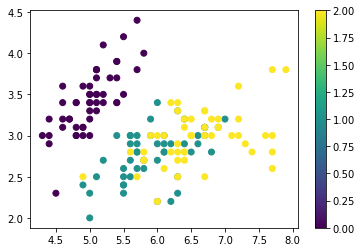

In [25]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c = df['target'])
plt.colorbar()

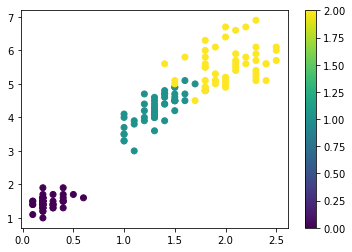

In [26]:
plt.scatter(df['petal width (cm)'],df['petal length (cm)'],c = df['target'])
plt.colorbar()

## Create more variables

In [27]:
df = (df
      .assign(petal_ar = lambda d:d['petal width (cm)']/d['petal length (cm)'])
      .assign(sepal_ar = lambda d:d['sepal width (cm)']/d['sepal length (cm)'])
      .assign(petal_area = lambda d: d['petal length (cm)'] * d['petal width (cm)'])
      .assign(sepal_area = lambda d: d['sepal length (cm)'] * d['sepal width (cm)'])
     )

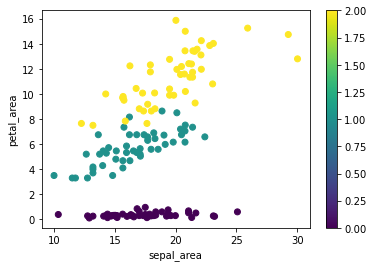

In [84]:
plt.scatter(df['sepal_area'],df['petal_area'],c = df['target'])
plt.xlabel('sepal_area')
plt.ylabel('petal_area')
plt.colorbar()

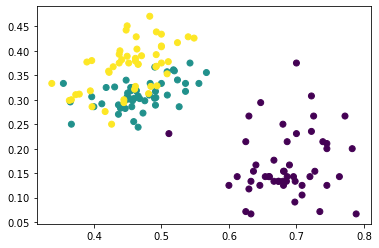

In [85]:
plt.scatter(df['sepal_ar'],df['petal_ar'],c = df['target'])

## Dimensionality reduction

Principal component analysis

In [86]:
from sklearn.decomposition import PCA

In [87]:
pca = PCA(n_components=2)

data = df[['sepal width (cm)','sepal length (cm)','petal width (cm)','petal length (cm)']]

data_t = pca.fit_transform(data)

In [88]:
data_t.shape

(150, 2)

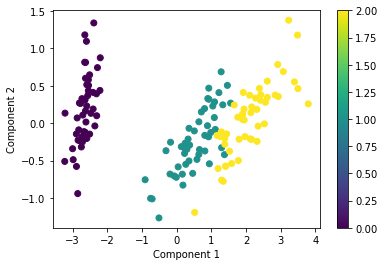

In [89]:
plt.scatter(data_t[:,0],data_t[:,1],c = df['target'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()

In [93]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name', 'petal_ar', 'sepal_ar',
       'petal_area', 'sepal_area'],
      dtype='object')

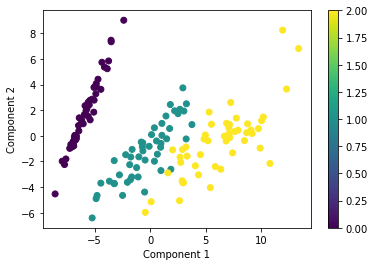

In [97]:
pca = PCA(n_components=2)

data = df.drop(['target','target_name'],axis=1)

data_t = pca.fit_transform(data)

plt.scatter(data_t[:,0],data_t[:,1],c = df['target'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()

# Classification

Before that, a bit of style!

In [125]:
iris = datasets.load_iris()

In [98]:
df = ( pd
      .DataFrame(iris['data'], columns=iris['feature_names'])
      .assign(target = iris.target)
      .assign(target_name = lambda d : iris.target_names[d['target']])
      .assign(petal_ar = lambda d:d['petal width (cm)']/d['petal length (cm)'])
      .assign(sepal_ar = lambda d:d['sepal width (cm)']/d['sepal length (cm)'])
      .assign(petal_area = lambda d: d['petal length (cm)'] * d['petal width (cm)'])
      .assign(sepal_area = lambda d: d['sepal length (cm)'] * d['sepal width (cm)'])
)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,petal_ar,sepal_ar,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,0,setosa,0.142857,0.686275,0.28,17.85
1,4.9,3.0,1.4,0.2,0,setosa,0.142857,0.612245,0.28,14.70
2,4.7,3.2,1.3,0.2,0,setosa,0.153846,0.680851,0.26,15.04
3,4.6,3.1,1.5,0.2,0,setosa,0.133333,0.673913,0.30,14.26
4,5.0,3.6,1.4,0.2,0,setosa,0.142857,0.720000,0.28,18.00


In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [165]:
X = df.drop(['target','target_name'],axis=1)
y = df[['target']]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
dectree = DecisionTreeClassifier().fit(X_train, y_train)

In [189]:
z_train = dectree.predict(X_train)
z_test = dectree.predict(X_test)

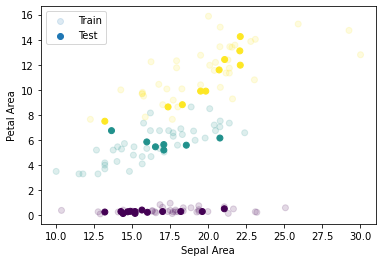

In [190]:
plt.scatter(X_train['sepal_area'],X_train['petal_area'], c=z_train, alpha = 0.15,label = 'Train')
plt.scatter(X_test['sepal_area'],X_test['petal_area'], c=z_test,label = 'Test')
plt.xlabel('Sepal Area')
plt.ylabel('Petal Area')
plt.legend()

In [191]:
dectree.score(X_test,y_test)

1.0

[Text(0, 0, 'setosa'), Text(0, 1, 'versicolor'), Text(0, 2, 'virginica')]

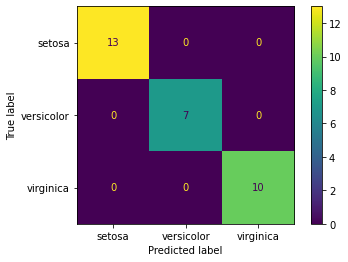

In [192]:
disp = plot_confusion_matrix(dectree, X_test, y_test)
disp.ax_.set_xticklabels(iris.target_names)
disp.ax_.set_yticklabels(iris.target_names)

In [193]:
from sklearn.model_selection import cross_val_score

In [194]:
cross_val_score(dectree, X, y, cv=10)

array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [195]:
from sklearn.neighbors import KNeighborsClassifier

In [216]:
knn = KNeighborsClassifier(n_neighbors=5)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = knn.fit(X_train, y_train.values.ravel())

In [218]:
z_test = knn.predict(X_test)
z_train = knn.predict(X_train)

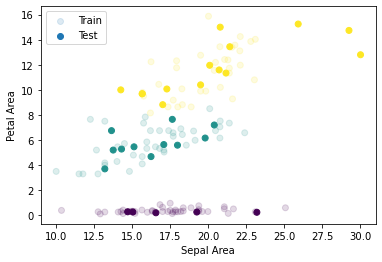

In [219]:
plt.scatter(X_train['sepal_area'],X_train['petal_area'], c=z_train, alpha = 0.15,label = 'Train')
plt.scatter(X_test['sepal_area'],X_test['petal_area'], c=z_test,label = 'Test')
plt.xlabel('Sepal Area')
plt.ylabel('Petal Area')
plt.legend()

### What are the k nearest neighbours?

In [122]:
A = np.random.rand(50,2)

In [129]:
selected = 13
d = (A[:,0] - A[13,0])**2 + (A[:,1] - A[13,1])**2
sorted_indices = np.argsort(d)
first_five_neighbours = sorted_indices[:5]

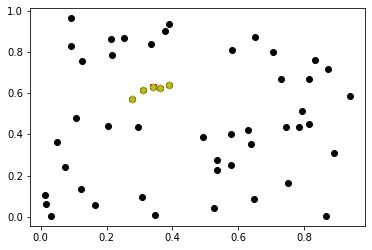

In [131]:
selected = 13
plt.plot(A[:,0],A[:,1],'ko')
plt.plot(A[13,0],A[13,1],'rv')
plt.plot(A[first_five_neighbours,0],A[first_five_neighbours,1],'yd')

### Grid search

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


clf = KNeighborsClassifier()
grid_values = {'n_neighbors': [1,2,5,10,20,50],
              'weights':['uniform','distance']}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')
grid_clf_acc.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 20, 50],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [138]:
pd.DataFrame(grid_clf_acc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002198,0.000981,0.002791,0.000399,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",1.000000,0.916667,0.958333,0.958333,1.000000,0.966667,0.031180,8
1,0.002585,0.000493,0.002599,0.001018,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",1.000000,0.916667,0.958333,0.958333,1.000000,0.966667,0.031180,8
2,0.001801,0.000400,0.003183,0.001166,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",1.000000,0.958333,0.958333,0.958333,1.000000,0.975000,0.020412,3
3,0.002592,0.000483,0.001794,0.000743,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",1.000000,0.916667,0.958333,0.958333,1.000000,0.966667,0.031180,8
4,0.002196,0.000751,0.001988,0.000005,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",1.000000,1.000000,0.958333,0.958333,1.000000,0.983333,0.020412,1
5,0.001996,0.000628,0.001792,0.000400,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",1.000000,1.000000,0.958333,0.958333,1.000000,0.983333,0.020412,1
6,0.001995,0.000004,0.002192,0.000402,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",1.000000,1.000000,0.958333,0.958333,0.958333,0.975000,0.020412,3
7,0.001590,0.000488,0.001597,0.000494,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",1.000000,1.000000,0.958333,0.958333,0.958333,0.975000,0.020412,3
8,0.001597,0.000488,0.001992,0.000003,20,uniform,"{'n_neighbors': 20, 'weights': 'uniform'}",1.000000,0.958333,0.958333,1.000000,0.958333,0.975000,0.020412,3
9,0.001196,0.000402,0.002192,0.000396,20,distance,"{'n_neighbors': 20, 'weights': 'distance'}",1.000000,0.958333,0.958333,0.958333,0.958333,0.966667,0.016667,8


In [140]:
#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

array([0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2,
       0, 2, 1, 1, 0, 1, 1, 1])

In [143]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))

Accuracy Score : 0.9666666666666667


### Multiple models and multiple parameters

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [147]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [148]:
# Create a pipeline
pipe = Pipeline([('classifier', KNeighborsClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors': [1, 5, 10]},
                {'classifier': [DecisionTreeClassifier()],
                 'classifier__max_features': [1,2,3]},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]


In [150]:
clf = GridSearchCV(pipe,search_space, cv=5)

In [151]:
best_model = clf.fit(X,y)

In [152]:
pd.DataFrame(best_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__n_neighbors,param_classifier__max_features,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000797,0.000399,0.002591,0.001352,KNeighborsClassifier(n_neighbors=10),1,NaN,NaN,{'classifier': KNeighborsClassifier(n_neighbor...,0.966667,0.966667,0.933333,0.933333,1.000000,0.960000,0.024944,8
1,0.000399,0.000488,0.001794,0.000746,KNeighborsClassifier(n_neighbors=10),5,NaN,NaN,{'classifier': KNeighborsClassifier(n_neighbor...,0.966667,1.000000,0.933333,0.966667,1.000000,0.973333,0.024944,2
2,0.001002,0.000009,0.002190,0.000742,KNeighborsClassifier(n_neighbors=10),10,NaN,NaN,{'classifier': KNeighborsClassifier(n_neighbor...,0.966667,1.000000,1.000000,0.933333,1.000000,0.980000,0.026667,1
3,0.000595,0.000486,0.000199,0.000399,DecisionTreeClassifier(),NaN,1,NaN,"{'classifier': DecisionTreeClassifier(), 'clas...",0.933333,0.933333,0.833333,0.866667,0.966667,0.906667,0.048990,15
4,0.001000,0.000635,0.000196,0.000393,DecisionTreeClassifier(),NaN,2,NaN,"{'classifier': DecisionTreeClassifier(), 'clas...",0.966667,0.966667,0.900000,0.900000,0.966667,0.940000,0.032660,14
5,0.000401,0.000491,0.000398,0.000488,DecisionTreeClassifier(),NaN,3,NaN,"{'classifier': DecisionTreeClassifier(), 'clas...",0.966667,0.966667,0.900000,0.966667,1.000000,0.960000,0.032660,5
6,0.011562,0.001351,0.001197,0.000401,RandomForestClassifier(),NaN,1,10,"{'classifier': RandomForestClassifier(), 'clas...",0.966667,0.966667,0.933333,0.933333,1.000000,0.960000,0.024944,8
7,0.105553,0.002330,0.006182,0.000405,RandomForestClassifier(),NaN,1,100,"{'classifier': RandomForestClassifier(), 'clas...",0.966667,0.966667,0.900000,0.966667,1.000000,0.960000,0.032660,5
8,1.126166,0.038088,0.074950,0.003959,RandomForestClassifier(),NaN,1,1000,"{'classifier': RandomForestClassifier(), 'clas...",0.966667,0.966667,0.900000,0.933333,1.000000,0.953333,0.033993,12
9,0.013359,0.000484,0.001994,0.000885,RandomForestClassifier(),NaN,2,10,"{'classifier': RandomForestClassifier(), 'clas...",0.966667,0.966667,0.933333,0.966667,1.000000,0.966667,0.021082,3


### Excercise: analyze handwritten digits

In [153]:
from sklearn.datasets import load_digits

In [154]:
digits = load_digits()

In [156]:
digits.data.shape

(1797, 64)

In [157]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

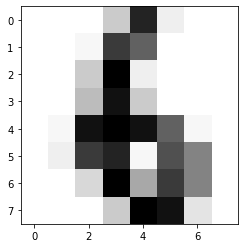

In [164]:
plt.imshow(np.reshape(digits.data[34],(8,8)),cmap = 'Greys')

Among your models use SVC (support vector classifier, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)


In [352]:
from sklearn.svm import SVC

## Additional resources (from sklearn documentation)

Automatically created module for IPython interactive environment


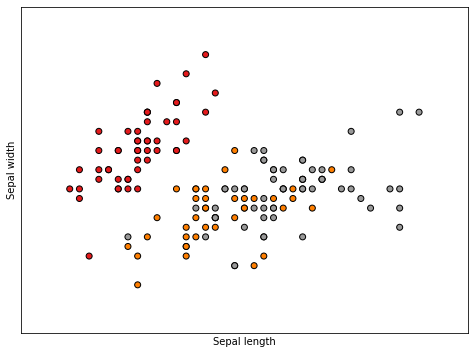

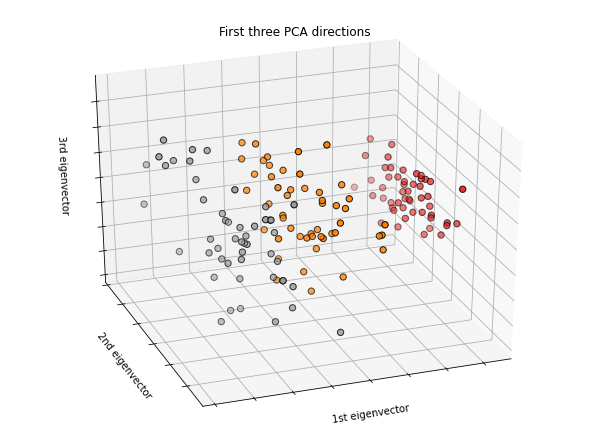

In [50]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [82]:
from sklearn import datasets, neighbors, linear_model

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(max_iter=1000)

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.961111
LogisticRegression score: 0.933333


In [ ]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()